In [1]:
# parallelism in python using multiprocessing
# comparing sequential and parallel merge sort for small and large datasets

In [2]:
# imports

import random
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
from IPython.display import display, clear_output


In [3]:
# dataset sizes

Ns = [1000 * i for i in range(1, 1002, 50)] 
print(f"Dataset sizes: {Ns[:10]} ... {Ns[-1]}")


Dataset sizes: [1000, 51000, 101000, 151000, 201000, 251000, 301000, 351000, 401000, 451000] ... 1001000


In [4]:
# -------- sequential merge sort --------

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
        
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result, i, j = [], 0, 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
            
        else:
            result.append(right[j])
            j += 1
            
    result.extend(left[i:])
    result.extend(right[j:])
    
    return result

In [5]:
# -------- parallel merge sort --------
def parallel_merge_sort(arr):
    n_cores = cpu_count()
    size = len(arr) // n_cores
    chunks = [arr[i*size:(i+1)*size] for i in range(n_cores)]
    
    with Pool(processes=n_cores) as pool:
        sorted_chunks = pool.map(merge_sort, chunks)
    
    # merge sorted chunks sequentially
    while len(sorted_chunks) > 1:
        new_chunks = []
        
        for i in range(0, len(sorted_chunks), 2):
            if i + 1 < len(sorted_chunks):
                new_chunks.append(merge(sorted_chunks[i], sorted_chunks[i+1]))
                
            else:
                new_chunks.append(sorted_chunks[i])
                
        sorted_chunks = new_chunks
        
    return sorted_chunks[0]

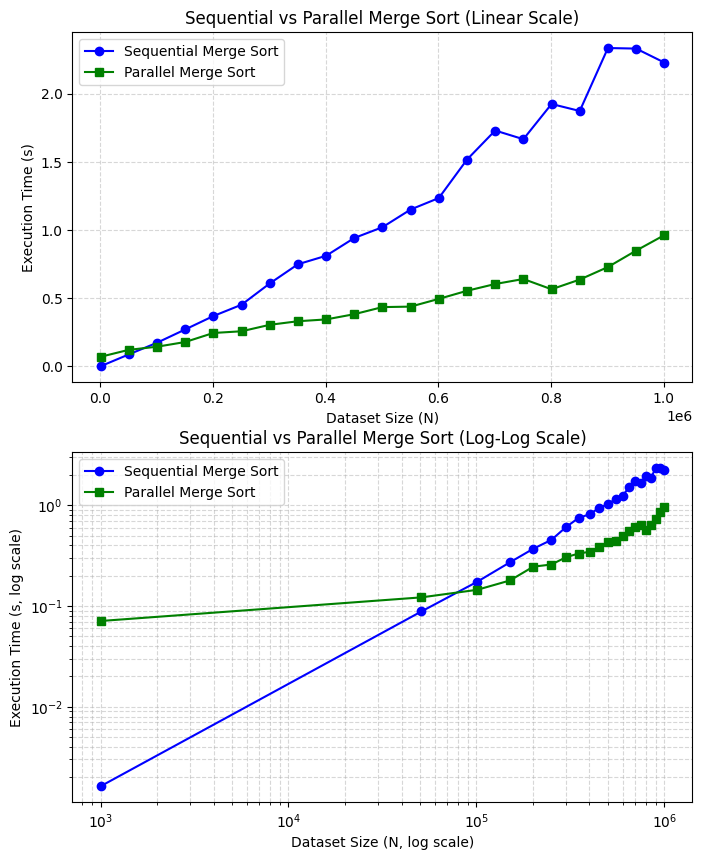

In [6]:
# computation and real-time plotting

times_seq = []
times_par = []

plt.ion()  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))  # wwo subplots for linear and log-log scale axes

for N in Ns:
    # generate dataset based on size in Ns list
    data = [random.randint(1, 1_000_000) for _ in range(N)]
    
    # sequential Merge Sort
    start = time.time()
    merge_sort(data.copy())
    end = time.time()
    times_seq.append(end - start)
    
    # parallel Merge Sort
    start = time.time()
    parallel_merge_sort(data.copy())
    end = time.time()
    times_par.append(end - start)
    
    # plear previous plots
    ax1.clear()
    ax2.clear()
    
    # --- linear Scale Plot ---
    ax1.plot(Ns[:len(times_seq)], times_seq, marker='o', label="Sequential Merge Sort", color="blue")
    ax1.plot(Ns[:len(times_par)], times_par, marker='s', label="Parallel Merge Sort", color="green")
    ax1.set_xlabel("Dataset Size (N)")
    ax1.set_ylabel("Execution Time (s)")
    ax1.set_title("Sequential vs Parallel Merge Sort (Linear Scale)")
    ax1.legend()
    ax1.grid(True, ls="--", alpha=0.5)
    
    # --- log-log Scale Plot ---
    ax2.plot(Ns[:len(times_seq)], times_seq, marker='o', label="Sequential Merge Sort", color="blue")
    ax2.plot(Ns[:len(times_par)], times_par, marker='s', label="Parallel Merge Sort", color="green")
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Dataset Size (N, log scale)")
    ax2.set_ylabel("Execution Time (s, log scale)")
    ax2.set_title("Sequential vs Parallel Merge Sort (Log-Log Scale)")
    ax2.legend()
    ax2.grid(True, which="both", ls="--", alpha=0.5)
    
    # display updated plots
    display(fig)
    clear_output(wait=True)

plt.ioff()
plt.show()
